# Setup

In [1]:
import os
import json

from tqdm import tqdm 

import numpy as np
import pandas as pd
from pandasgui import show

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.dates as mdates

# PHASE 1: Load Data 

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df = pd.read_csv(r"C:\Users\kerem.cantimur\Desktop\VscodeProjects\KaracaModelleri\ForForecast.csv")
df['TransactionDateTime'] = pd.to_datetime(df['TransactionDateTime'])
df.set_index('TransactionDateTime', inplace=True)
df = df.sort_index()

print(f"Shape {df.shape}")
df.tail(10)

Shape (13499, 19)


ChannelKey  DataAreaKey InventKey InventLocationKey  \
TransactionDateTime                                                        
2024-02-08 22:12:00           2            3    others            others   
2024-02-08 22:12:00           2            3    others            others   
2024-02-08 22:12:00           2            3    others            others   
2024-02-08 22:12:00           2            3    others            others   
2024-02-08 22:12:00           2            3    others            others   
2024-02-08 22:28:00           2            3    others            others   
2024-02-08 22:28:00           2            3    others            others   
2024-02-08 22:28:00           2            3    others            others   
2024-02-08 22:28:00           2            3    others            others   
2024-02-08 22:28:00           2            3    others            others   

                    CampaignKrcKey  SalesQuantity  SalesGrossAmount  \
TransactionDateTime                                                   
2024-02-08 22:12:00           6414            4.0            221.01   
2024-02-08 22:12:00           6414            1.0            127.51   
2024-02-08 22:12:00           6414            4.0            221.01   
2024-02-08 22:12:00           6414            1.0            127.52   
2024-02-08 22:12:00           6414            1.0            115.91   
2024-02-08 22:28:00            -99            1.0            110.49   
2024-02-08 22:28:00           6415            3.0            101.99   
2024-02-08 22:28:00              2            1.0            297.49   
2024-02-08 22:28:00            -99            1.0             84.99   
2024-02-08 22:28:00            -99            2.0            305.99   

                     Return_Quantity  NetQuantity  NetGrossAmount  \
TransactionDateTime                                                 
2024-02-08 22:12:00              0.0          4.0          221.01   
2024-02-08 22:12:00              0.0          1.0          127.51   
2024-02-08 22:12:00              0.0          4.0          221.01   
2024-02-08 22:12:00              0.0          1.0          127.52   
2024-02-08 22:12:00              0.0          1.0          115.91   
2024-02-08 22:28:00              0.0          1.0          110.49   
2024-02-08 22:28:00              0.0          3.0          101.99   
2024-02-08 22:28:00              0.0          1.0          297.49   
2024-02-08 22:28:00              0.0          1.0           84.99   
2024-02-08 22:28:00              0.0          2.0          305.99   

                     ReturnGrossAmount  ReturnNetAmount  NetAmountWOVat  \
TransactionDateTime                                                       
2024-02-08 22:12:00                0.0              0.0          184.17   
2024-02-08 22:12:00                0.0              0.0          106.26   
2024-02-08 22:12:00                0.0              0.0          184.17   
2024-02-08 22:12:00                0.0              0.0          106.27   
2024-02-08 22:12:00                0.0              0.0           96.59   
2024-02-08 22:28:00                0.0              0.0           92.07   
2024-02-08 22:28:00                0.0              0.0           84.99   
2024-02-08 22:28:00                0.0              0.0          270.45   
2024-02-08 22:28:00                0.0              0.0           70.83   
2024-02-08 22:28:00                0.0              0.0          254.99   

                     DiscountAmount  DiscountGrossAmount RboStoreKey  \
TransactionDateTime                                                    
2024-02-08 22:12:00          390.71               390.71      others   
2024-02-08 22:12:00          343.07               343.07      others   
2024-02-08 22:12:00          390.71               390.71      others   
2024-02-08 22:12:00          343.06               343.06      others   
2024-02-08 22:12:00          213.49               213.49      others   
2024-02-08 22:28:00  

In [5]:
df.dtypes

ChannelKey               int64
DataAreaKey              int64
InventKey               object
InventLocationKey       object
CampaignKrcKey          object
SalesQuantity          float64
SalesGrossAmount       float64
Return_Quantity        float64
NetQuantity            float64
NetGrossAmount         float64
ReturnGrossAmount      float64
ReturnNetAmount        float64
NetAmountWOVat         float64
DiscountAmount         float64
DiscountGrossAmount    float64
RboStoreKey             object
NetAmount              float64
HourIntervalKey          int64
IsFirstOrder              bool
dtype: object

# PHASE 2: Prepare Data

## Resample and fix

In [6]:
desired_column = 'NetAmountWOVat'

In [7]:
df = df[[desired_column]]

In [8]:
resampled_df = df.resample('60T', closed="left").sum()
print(resampled_df.shape)

(206, 1)


In [9]:
resampled_df.head(10)

NetAmountWOVat
TransactionDateTime                
2024-01-31 09:00:00         7444.94
2024-01-31 10:00:00        16321.85
2024-01-31 11:00:00        16112.86
2024-01-31 12:00:00         9955.61
2024-01-31 13:00:00        36883.48
2024-01-31 14:00:00        11374.87
2024-01-31 15:00:00        49252.87
2024-01-31 16:00:00        65630.39
2024-01-31 17:00:00        31425.66
2024-01-31 18:00:00        39486.80

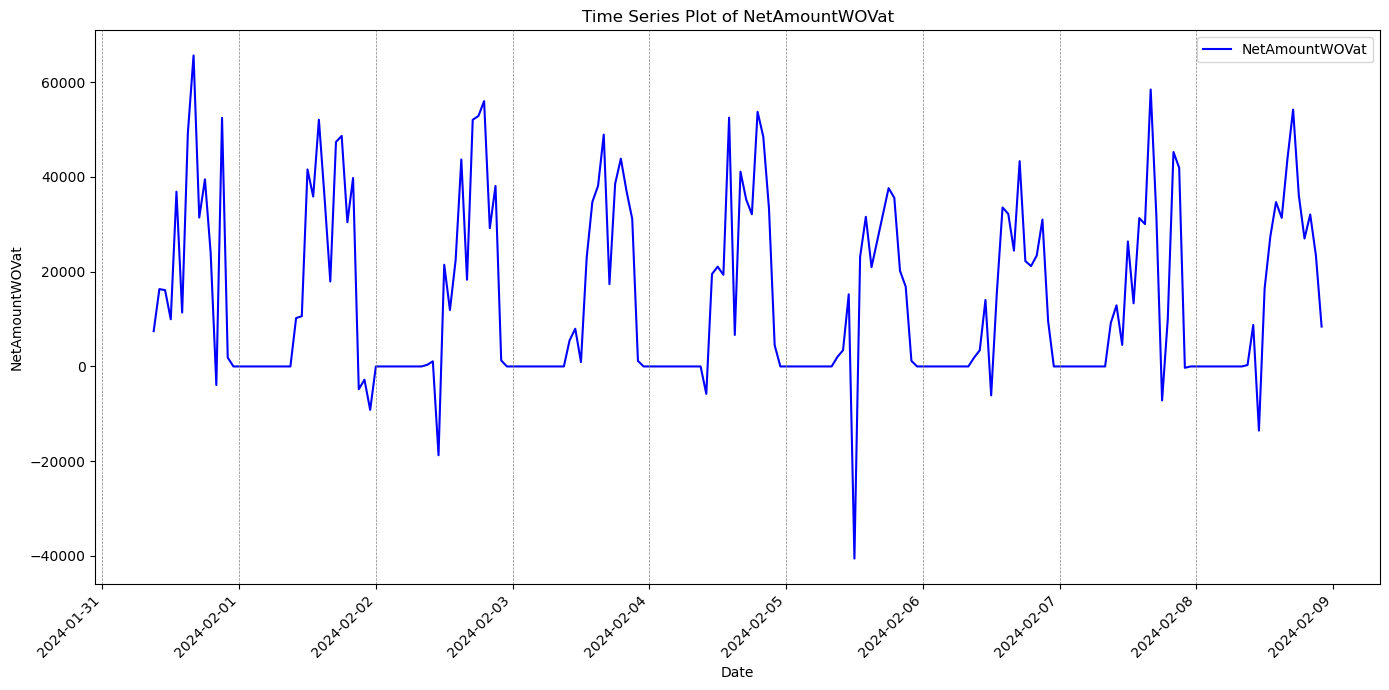

In [10]:
plt.figure(figsize=(14, 7))

# Plotting the NetAmountWOVat from resampled_df
plt.plot(resampled_df.index, resampled_df[f'{desired_column}'], label=f'{desired_column}', color='blue')

# Customize the plot
plt.xlabel('Date')
plt.ylabel(f'{desired_column}')
plt.title(f'Time Series Plot of {desired_column}')

# Date formatting for better readability
plt.gca().xaxis.set_major_locator(mdates.DayLocator())  # Adjust this based on your data frequency
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Adjust the date format as needed

# Rotate x-axis labels for skew
plt.xticks(rotation=45, ha='right')

# Add vertical dashed lines to separate days
for date in np.unique(resampled_df.index.date):
    plt.axvline(x=date, color='gray', linestyle='--', linewidth=0.5)

plt.legend()
plt.tight_layout()  # Ensure proper spacing
plt.show()

In [11]:
Q1 = resampled_df[desired_column].quantile(0.25)
Q3 = resampled_df[desired_column].quantile(0.75)
IQR = Q3 - Q1

# Define threshold for outliers
lower_bound = Q1 - 1 * IQR
upper_bound = Q3 + 1 * IQR

outliers = resampled_df[(resampled_df[desired_column] < lower_bound) | (resampled_df[desired_column] > upper_bound)]

resampled_df = resampled_df[(resampled_df[desired_column] >= lower_bound) & (resampled_df[desired_column] <= upper_bound)]

# Display information about removed outliers
print("Number of outliers removed:", len(outliers))
print("DataFrame size after removing outliers:", len(resampled_df))

Number of outliers removed: 2
DataFrame size after removing outliers: 204


In [12]:
resampled_df["HourInterval"] = resampled_df.index.hour
resampled_df['DayOfWeek'] = resampled_df.index.dayofweek + 1

resampled_df[f'{desired_column} Before'] = resampled_df[f'{desired_column}'].shift(1)

window_size = 3
resampled_df['RollingMean'] = resampled_df[f'{desired_column}'].rolling(window=window_size, min_periods=1).mean()
resampled_df['RollingStd'] = resampled_df[f'{desired_column}'].rolling(window=window_size, min_periods=1).std()

resampled_df = resampled_df.dropna()

In [13]:
print(resampled_df.shape)
resampled_df.head()

(203, 6)


NetAmountWOVat  HourInterval  DayOfWeek  \
TransactionDateTime                                            
2024-01-31 10:00:00        16321.85            10          3   
2024-01-31 11:00:00        16112.86            11          3   
2024-01-31 12:00:00         9955.61            12          3   
2024-01-31 13:00:00        36883.48            13          3   
2024-01-31 14:00:00        11374.87            14          3   

                     NetAmountWOVat Before   RollingMean    RollingStd  
TransactionDateTime                                                     
2024-01-31 10:00:00                7444.94  11883.395000   6276.923257  
2024-01-31 11:00:00               16321.85  13293.216667   5065.834007  
2024-01-31 12:00:00               16112.86  14130.106667   3616.730018  
2024-01-31 13:00:00                9955.61  20983.983333  14109.338311  
2024-01-31 14:00:00               36883.48  19404.653333  15153.732575

## Train-Test Split

In [14]:
train_ratio = 0.8  # Adjust as needed
train_size = int(len(resampled_df) * train_ratio)

train_df = resampled_df[:train_size]
valid_df = resampled_df[train_size:]

In [15]:
print("Train size:", train_size, "Valid Size:", len(resampled_df) - train_size)

Train size: 162 Valid Size: 41


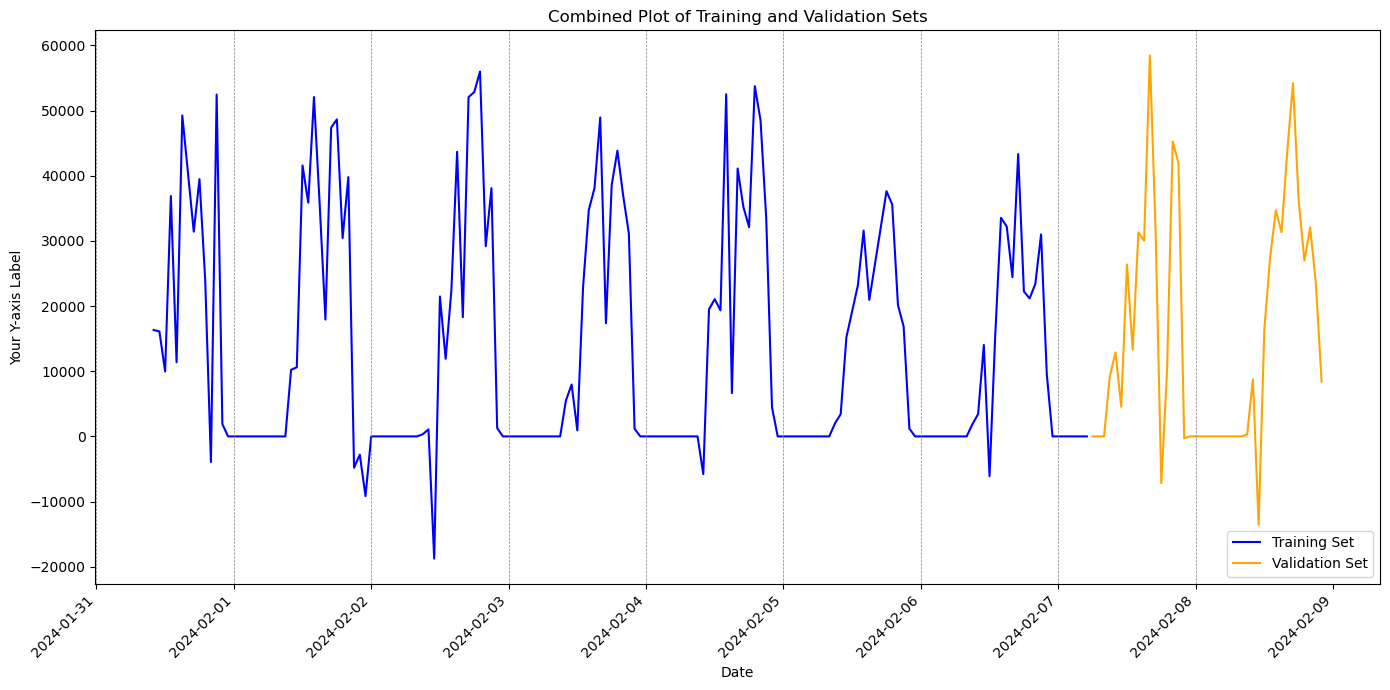

In [16]:
plt.figure(figsize=(14, 7))

# Plotting the training and validation sets
plt.plot(train_df.index, train_df[f'{desired_column}'], label='Training Set', color='blue')
plt.plot(valid_df.index, valid_df[f'{desired_column}'], label='Validation Set', color='orange')

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Your Y-axis Label')
plt.title('Combined Plot of Training and Validation Sets')

# Date formatting for better readability
plt.gca().xaxis.set_major_locator(mdates.DayLocator())  # Adjust this based on your data frequency
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Adjust the date format as needed

# Rotate x-axis labels for skew
plt.xticks(rotation=45, ha='right')

# Add vertical dashed lines to separate days
for date in np.unique(resampled_df.index.date):
    plt.axvline(x=date, color='gray', linestyle='--', linewidth=0.5)

plt.legend()
plt.tight_layout() # Ensure proper spacing
plt.show()

## Datasets

In [17]:
import xgboost as xgb
import lightgbm as lgb

X_train, y_train = train_df.drop(columns=[desired_column]), train_df[desired_column]
X_valid, y_valid = valid_df.drop(columns=[desired_column]), valid_df[desired_column]

# Convert data to DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_valid, label=y_valid)

# Define the LightGBM dataset
ltrain = lgb.Dataset(X_train, label=y_train, feature_name='auto', categorical_feature='auto')
lvalid = lgb.Dataset(X_valid, label=y_valid, feature_name='auto', categorical_feature='auto', reference=ltrain)

In [18]:
X_valid

HourInterval  DayOfWeek  NetAmountWOVat Before  \
TransactionDateTime                                                   
2024-02-07 06:00:00             6          3                   0.00   
2024-02-07 07:00:00             7          3                   0.00   
2024-02-07 08:00:00             8          3                   0.00   
2024-02-07 09:00:00             9          3                   0.00   
2024-02-07 10:00:00            10          3                9186.90   
2024-02-07 11:00:00            11          3               12900.58   
2024-02-07 12:00:00            12          3                4545.71   
2024-02-07 13:00:00            13          3               26380.39   
2024-02-07 14:00:00            14          3               13332.09   
2024-02-07 15:00:00            15          3               31310.19   
2024-02-07 16:00:00            16          3               30046.40   
2024-02-07 17:00:00            17          3               58455.45   
2024-02-07 18:00:00            18          3               31651.27   
2024-02-07 19:00:00            19          3               -7171.68   
2024-02-07 20:00:00            20          3               10000.07   
2024-02-07 21:00:00            21          3               45257.45   
2024-02-07 22:00:00            22          3               41939.75   
2024-02-07 23:00:00            23          3                -290.14   
2024-02-08 00:00:00             0          4                   0.00   
2024-02-08 01:00:00             1          4                   0.00   
2024-02-08 02:00:00             2          4                   0.00   
2024-02-08 03:00:00             3          4                   0.00   
2024-02-08 04:00:00             4          4                   0.00   
2024-02-08 05:00:00             5          4                   0.00   
2024-02-08 06:00:00             6          4                   0.00   
2024-02-08 07:00:00             7          4                   0.00   
2024-02-08 08:00:00             8          4                   0.00   
2024-02-08 09:00:00             9          4                   0.00   
2024-02-08 10:00:00            10          4                 291.61   
2024-02-08 11:00:00            11          4                8764.06   
2024-02-08 12:00:00            12          4              -13541.08   
2024-02-08 13:00:00            13          4               16478.08   
2024-02-08 14:00:00            14          4               27416.69   
2024-02-08 15:00:00            15          4               34684.19   
2024-02-08 16:00:00            16          4               31353.18   
2024-02-08 17:00:00            17          4               43761.77   
2024-02-08 18:00:00            18          4               54206.70   
2024-02-08 19:00:00            19          4               36130.63   
2024-02-08 20:00:00            20          4               26992.63   
2024-02-08 21:00:00            21          4               32083.99   
2024-02-08 22:00:00            22          4               23429.17   

                      RollingMean    RollingStd  
TransactionDateTime                              
2024-02-07 06:00:00      0.000000      0.000000  
2024-02-07 07:00:00      0.000000      0.000000  
2024-02-07 08:00:00      0.000000      0.000000  
2024-02-07 09:00:00   3062.300000   5304.059188  
2024-02-07 10:00:00   7362.493333   6640.977778  
2024-02-07 11:00:00   8877.730000   4186.006778  
2024-02-07 12:00:00  14608.893333  11017.125919  
2024-02-07 13:00:00  14752.730000  10986.445111  
2024-02-07 14:00:00  23674.223333   9289.538386  
2024-02-07 15:00:00  24896.226667  10034.751314  
2024-02-07 16:00:00  39937.346667  16049.592038  
2024-02-07 17:00:00  40051.040000  15958.873159  
2024-02-07 18:00:00  27645.013333  32996.478863  
2024-02-07 19:00:00  11493.220000  19454.497793  
2024-02-07 20:00:00  16028.613333  26729.401774  
2024-02-07 21:00:00  32399.090000  19468.920259  
2024-02-07 22:00:00  28969.020000  25393.416790  
2024-02-07 23:00:

# PHASE 3: Training

## Setup

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor

## XGBoost

In [20]:
param_grid = {
    'max_depth': [3, 6, 9],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200]
}

# Create an XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', seed=0)

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=2, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 972 candidates, totalling 4860 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0], 'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 6, 9], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='neg_mean_squared_error', verbose=2)

In [21]:
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 50, 'subsample': 0.8}


In [22]:
# General Parameters
params = {
    'booster': 'gbtree',  # Options: 'gbtree', 'gblinear', 'dart'
    'silent': 0,          # 0 prints messages, 1 suppresses
    'nthread': -1         # Number of parallel threads, -1 uses maximum available

}
# Booster Parameters
params.update({
    'eta': 0.1,            # Learning rate
    'max_depth': 3,        # Maximum depth of a tree
    'subsample': 0.8,        # Fraction of training data to randomly sample
    'colsample_bytree': 0.8, # Fraction of features to be randomly sampled
    'lambda': 1,           # L2 regularization term on weights
    'alpha': 0             # L1 regularization term on weights
})

# Learning Task Parameters
params.update({
    'objective': 'reg:squarederror',  # Options: 'reg:squarederror', 'binary:logistic', etc.
    'eval_metric': 'rmse'              # Metric used for evaluation
})

# Tree-Specific Parameters
params.update({
    'gamma': 0,              # Minimum loss reduction for further partition on a leaf node
    'min_child_weight': 3,   # Minimum sum of instance weight needed in a child
    'max_delta_step': 0      # Maximum delta step allowed for each tree's weight estimation
})

# Training Parameters
params.update({
    'seed': 0,              # Random seed for reproducibility
    'num_boost_round': 50  # Number of boosting rounds (trees)
})

# Train the model
xgb_model = xgb.train(params, dtrain, num_boost_round=params['num_boost_round'], evals=[(dtrain, 'train'), (dvalid, 'valid')], early_stopping_rounds=10)

xgb_predictions = xgb_model.predict(dvalid)

# Evaluate the model
rmse = mean_squared_error(y_valid, xgb_predictions, squared=False)
print(f"Root Mean Squared Error on validation set: {rmse}")

[0]	train-rmse:16407.28306	valid-rmse:17038.59979
[1]	train-rmse:15323.15846	valid-rmse:16046.79444
[2]	train-rmse:14154.83691	valid-rmse:15116.36378
[3]	train-rmse:13147.66024	valid-rmse:14251.02910
[4]	train-rmse:12215.74017	valid-rmse:13552.53670
[5]	train-rmse:11421.23848	valid-rmse:13054.24498
[6]	train-rmse:10724.25584	valid-rmse:12581.22795
[7]	train-rmse:10093.26672	valid-rmse:12222.27819
[8]	train-rmse:9589.86933	valid-rmse:11936.00804
[9]	train-rmse:9103.86001	valid-rmse:11665.17811
[10]	train-rmse:8636.00102	valid-rmse:11259.81528
[11]	train-rmse:8252.73327	valid-rmse:10865.14345
[12]	train-rmse:7844.37643	valid-rmse:10691.03459
[13]	train-rmse:7524.99832	valid-rmse:10573.06973
[14]	train-rmse:7262.47664	valid-rmse:10537.53376
[15]	train-rmse:7053.25873	valid-rmse:10445.22375
[16]	train-rmse:6780.76885	valid-rmse:10168.02828
[17]	train-rmse:6608.32538	valid-rmse:10048.54105
[18]	train-rmse:6416.76335	valid-rmse:9952.25814
[19]	train-rmse:6263.27966	valid-rmse:9864.28421
[20]

## LightGBM

In [24]:
lgb_seed = 0

param_grid = {
    'num_leaves': [20, 31, 40],            # Vary the number of leaves
    'learning_rate': [0.01, 0.05, 0.1],     # Vary the learning rate
    'subsample': [0.8, 0.9, 1.0],           # Vary the subsample ratio of the training data
    'colsample_bytree': [0.8, 0.9, 1.0]     # Vary the subsample ratio of columns when constructing each tree
}

# Create a LightGBM regressor
lgb_model = lgb.LGBMRegressor(objective='regression', metric='rmse', boosting_type='gbdt', verbose=0, random_state=lgb_seed)

# GridSearch
grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_lgb_model = grid_search.best_estimator_
lgb_pred = best_lgb_model.predict(X_valid)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_valid, lgb_pred))
print(f'Root Mean Squared Error on Validation Set: {rmse}')

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

## CatBoost

In [ ]:
from catboost import CatBoostRegressor

# Define the parameter grid for CatBoost
catboost_param_grid = {
    'iterations': [500, 1000],
    'depth': [6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'loss_function': ['RMSE']
}

# Create a CatBoost regressor
catboost_model = CatBoostRegressor(verbose=False)

# Create the GridSearchCV object
catboost_grid_search = GridSearchCV(catboost_model, catboost_param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV to the training data
catboost_grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_catboost_params = catboost_grid_search.best_params_
best_cat_model = catboost_grid_search.best_estimator_
cat_pred = best_cat_model.predict(X_valid)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_valid, cat_pred))
print(f'Root Mean Squared Error on Validation Set: {rmse}')

0:	learn: 17104.5399358	total: 138ms	remaining: 1m 9s
1:	learn: 17014.8822998	total: 140ms	remaining: 34.7s
2:	learn: 16904.2997089	total: 140ms	remaining: 23.2s
3:	learn: 16799.7260478	total: 141ms	remaining: 17.5s
4:	learn: 16698.8416498	total: 142ms	remaining: 14s
5:	learn: 16602.8987443	total: 142ms	remaining: 11.7s
6:	learn: 16500.8088149	total: 143ms	remaining: 10.1s
7:	learn: 16405.9414873	total: 144ms	remaining: 8.85s
8:	learn: 16304.3824612	total: 145ms	remaining: 7.89s
9:	learn: 16208.8370412	total: 145ms	remaining: 7.12s
10:	learn: 16128.3711573	total: 146ms	remaining: 6.48s
11:	learn: 16029.6109535	total: 147ms	remaining: 5.96s
12:	learn: 15923.7122676	total: 147ms	remaining: 5.51s
13:	learn: 15830.3172330	total: 148ms	remaining: 5.14s
14:	learn: 15744.1099170	total: 149ms	remaining: 4.81s
15:	learn: 15655.9574133	total: 149ms	remaining: 4.52s
16:	learn: 15570.3761071	total: 150ms	remaining: 4.26s
17:	learn: 15489.2458944	total: 151ms	remaining: 4.04s
18:	learn: 15404.02195

## Adaboost

In [29]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Base Decision Tree for AdaBoost
base_model = DecisionTreeRegressor()
param_grid_base = {'max_depth': [3, 5, 7]}

# Use GridSearchCV to find the best parameters for the base Decision Tree
grid_search_base = GridSearchCV(estimator=base_model, param_grid=param_grid_base, scoring='neg_mean_squared_error', cv=3)
grid_search_base.fit(X_train, y_train)

# Get the best parameters for the base model
best_base_params = grid_search_base.best_params_

# Create an AdaBoost regressor with the best base model parameters
adaboost_model = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(**best_base_params), n_estimators=50, learning_rate=0.1)

# Parameters for AdaBoost
param_grid_adaboost = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}

# Use GridSearchCV to find the best parameters for AdaBoost
grid_search_adaboost = GridSearchCV(estimator=adaboost_model, param_grid=param_grid_adaboost, scoring='neg_mean_squared_error', cv=3)
grid_search_adaboost.fit(X_train, y_train)

# Get the best parameters for AdaBoost
best_adaboost_params = grid_search_adaboost.best_params_

best_ada_model = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(**best_base_params), **best_adaboost_params)

best_ada_model.fit(X_train, y_train)

ada_pred = best_ada_model.predict(X_valid)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_valid, ada_pred))
print(f'Root Mean Squared Error on Validation Set: {rmse}')

Root Mean Squared Error on Validation Set: 10422.8539350637


## Random Forest

In [30]:
rf_seed = 0

rf_model = RandomForestRegressor(random_state=rf_seed)

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

# Make predictions on the validation set using the best model
rf_predictions = best_rf_model.predict(X_valid)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_valid, rf_predictions))
r2 = r2_score(y_valid, rf_predictions)

# Print the best parameters and evaluation metrics
print(f'Best Parameters: {best_params}')
print(f'Mean Squared Error (MSE): {rmse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}
Mean Squared Error (MSE): 9478.98
R-squared (R2): 0.73


# PHASE 4: Testing

## Plot inference

In [31]:
# Actual
actual_train_values = train_df[desired_column]
actual_valid_values = valid_df[desired_column]

# XGB
predicted_train_values_xgb = xgb_model.predict(dtrain)
predicted_valid_values_xgb = xgb_model.predict(dvalid)

# LGB
predicted_train_values_lgb = best_lgb_model.predict(X_train)
predicted_valid_values_lgb = best_lgb_model.predict(X_valid)

# Cat
predicted_train_values_cat = best_cat_model.predict(X_train)
predicted_valid_values_cat= best_cat_model.predict(X_valid)

# Ada
predicted_train_values_ada = best_ada_model.predict(X_train)
predicted_valid_values_ada= best_ada_model.predict(X_valid)

# RF
predicted_train_values_rf = best_rf_model.predict(X_train)
predicted_valid_values_rf = best_rf_model.predict(X_valid)

# Ensemble 
ensemble_train_predictions = (predicted_train_values_xgb + predicted_train_values_lgb + predicted_train_values_rf + predicted_train_values_cat + predicted_train_values_ada) / 5
ensemble_valid_predictions = (predicted_valid_values_xgb + predicted_valid_values_lgb + predicted_valid_values_rf + predicted_valid_values_cat + predicted_valid_values_ada) / 5

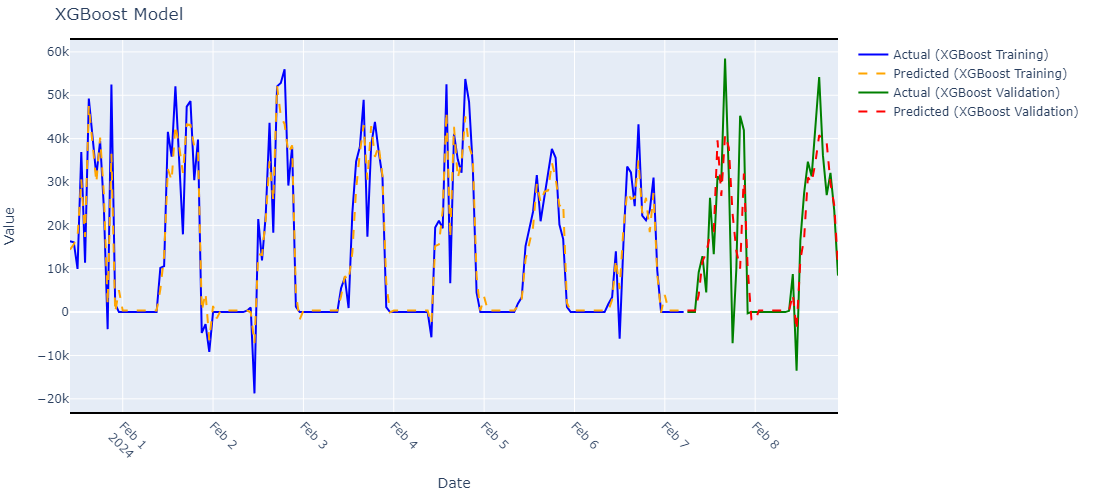

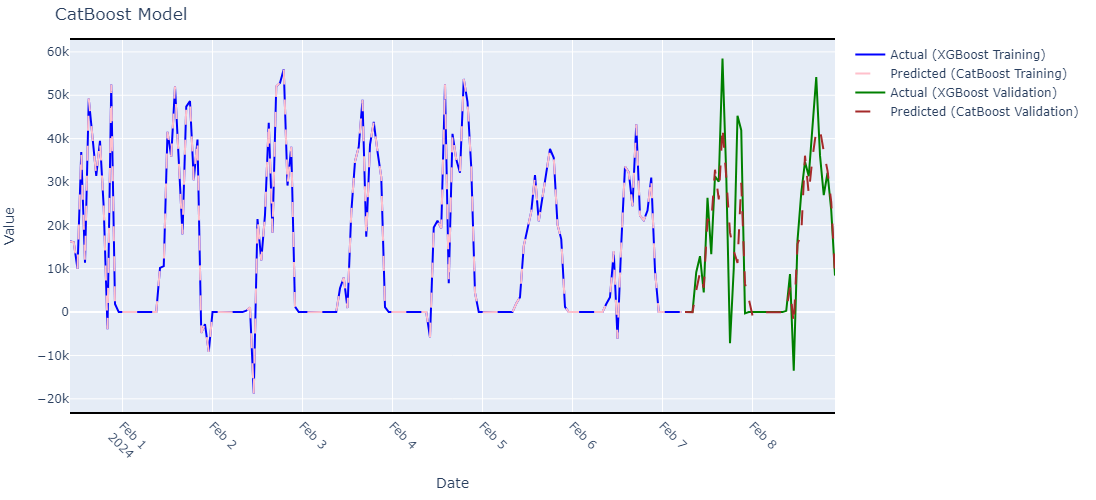

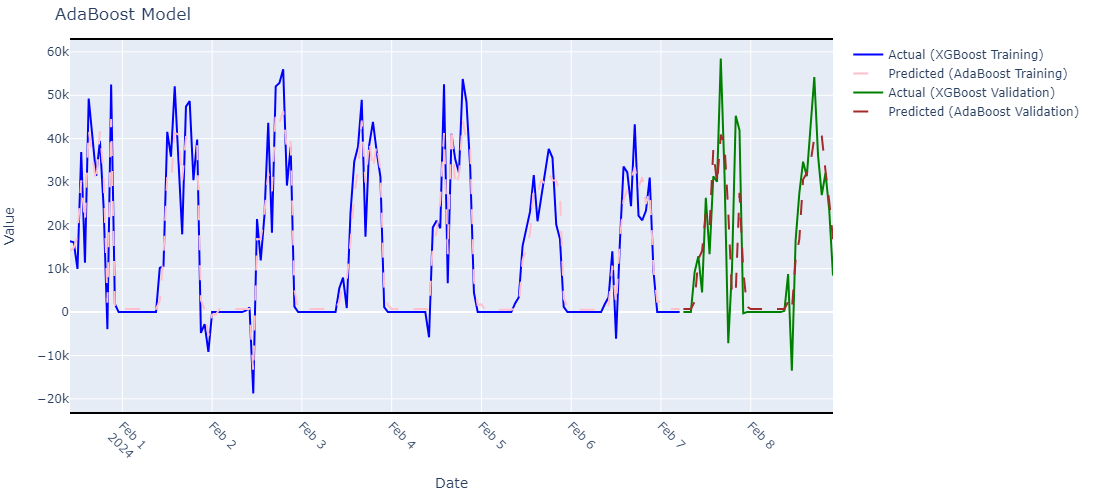

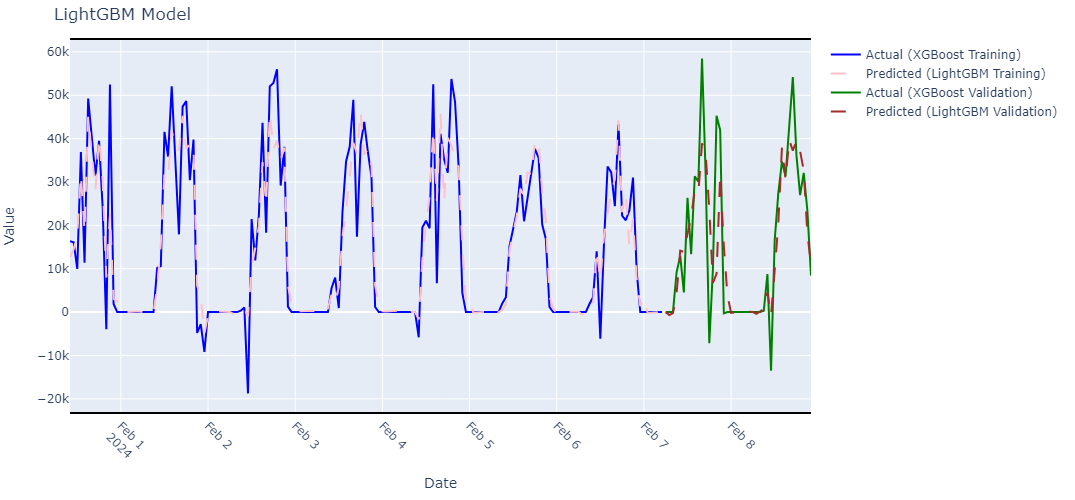

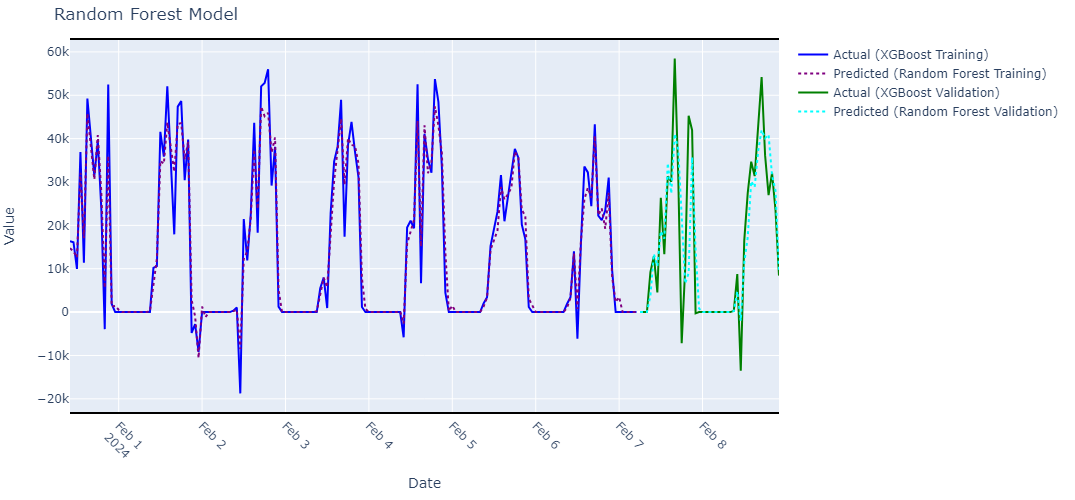

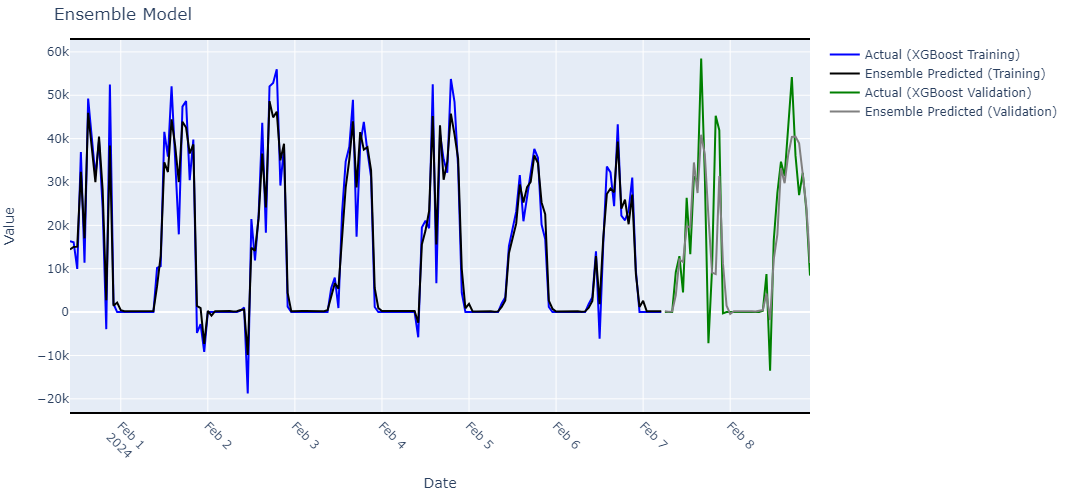

In [33]:
dates = resampled_df.index

trace_actual_train = go.Scatter(x=dates[:len(actual_train_values)], y=actual_train_values, mode='lines', name='Actual (Actual Training)', line=dict(color='blue'))
trace_actual_valid = go.Scatter(x=dates[-len(actual_valid_values):], y=actual_valid_values, mode='lines', name='Actual (Actual Validation)', line=dict(color='green'))

# Create traces for XGBoost
trace_predicted_train_xgb = go.Scatter(x=dates[:len(predicted_train_values_xgb)], y=predicted_train_values_xgb, mode='lines', name='Predicted (XGBoost Training)', line=dict(color='orange', dash='dash'))
trace_predicted_valid_xgb = go.Scatter(x=dates[-len(predicted_valid_values_xgb):], y=predicted_valid_values_xgb, mode='lines', name='Predicted (XGBoost Validation)', line=dict(color='red', dash='dash'))

# Create traces for LightGBM
trace_predicted_train_lgb = go.Scatter(x=dates[:len(predicted_train_values_lgb)], y=predicted_train_values_lgb, mode='lines', name='Predicted (LightGBM Training)', line=dict(color='pink', dash='longdash'))
trace_predicted_valid_lgb = go.Scatter(x=dates[-len(predicted_valid_values_lgb):], y=predicted_valid_values_lgb, mode='lines', name='Predicted (LightGBM Validation)', line=dict(color='brown', dash='longdash'))

# Create traces for Catboost
trace_predicted_train_cat = go.Scatter(x=dates[:len(predicted_train_values_cat)], y=predicted_train_values_cat, mode='lines', name='Predicted (CatBoost Training)', line=dict(color='pink', dash='longdash'))
trace_predicted_valid_cat = go.Scatter(x=dates[-len(predicted_valid_values_cat):], y=predicted_valid_values_cat, mode='lines', name='Predicted (CatBoost Validation)', line=dict(color='brown', dash='longdash'))

# Create traces for Adaoost
trace_predicted_train_ada = go.Scatter(x=dates[:len(predicted_train_values_ada)], y=predicted_train_values_ada, mode='lines', name='Predicted (AdaBoost Training)', line=dict(color='pink', dash='longdash'))
trace_predicted_valid_ada = go.Scatter(x=dates[-len(predicted_valid_values_ada):], y=predicted_valid_values_ada, mode='lines', name='Predicted (AdaBoost Validation)', line=dict(color='brown', dash='longdash'))

# Create traces for Random Forest
trace_predicted_train_rf = go.Scatter(x=dates[:len(predicted_train_values_rf)], y=predicted_train_values_rf, mode='lines', name='Predicted (Random Forest Training)', line=dict(color='purple', dash='dot'))
trace_predicted_valid_rf = go.Scatter(x=dates[-len(predicted_valid_values_rf):], y=predicted_valid_values_rf, mode='lines', name='Predicted (Random Forest Validation)', line=dict(color='cyan', dash='dot'))

# Create traces for Ensemble
trace_train_ensemble = go.Scatter(x=dates[:len(ensemble_train_predictions)], y=ensemble_train_predictions, mode='lines', name='Ensemble Predicted (Training)', line=dict(color='black', dash='solid'))
trace_valid_ensemble = go.Scatter(x=dates[-len(ensemble_valid_predictions):], y=ensemble_valid_predictions, mode='lines', name='Ensemble Predicted (Validation)', line=dict(color='gray', dash='solid'))

# Create layouts
layout_xgb = go.Layout(
    title='XGBoost Model',
    xaxis=dict(title='Date', tickangle=45, showline=True, linewidth=2, linecolor='black', mirror=True),
    yaxis=dict(title='Value'),
    height=500, 
    width=1100,
    margin=dict(l=40, r=40, b=40, t=40)
)

layout_lgb = go.Layout(
    title='LightGBM Model',
    xaxis=dict(title='Date', tickangle=45, showline=True, linewidth=2, linecolor='black', mirror=True),
    yaxis=dict(title='Value'),
    height=500, 
    width=1100,
    margin=dict(l=40, r=40, b=40, t=40)
)

layout_cat = go.Layout(
    title='CatBoost Model',
    xaxis=dict(title='Date', tickangle=45, showline=True, linewidth=2, linecolor='black', mirror=True),
    yaxis=dict(title='Value'),
    height=500, 
    width=1100,
    margin=dict(l=40, r=40, b=40, t=40)
)

layout_ada = go.Layout(
    title='AdaBoost Model',
    xaxis=dict(title='Date', tickangle=45, showline=True, linewidth=2, linecolor='black', mirror=True),
    yaxis=dict(title='Value'),
    height=500, 
    width=1100,
    margin=dict(l=40, r=40, b=40, t=40)
)

layout_rf = go.Layout(
    title='Random Forest Model',
    xaxis=dict(title='Date', tickangle=45, showline=True, linewidth=2, linecolor='black', mirror=True),
    yaxis=dict(title='Value'),
    height=500, 
    width=1100,
    margin=dict(l=40, r=40, b=40, t=40)
)

layout_ensemble = go.Layout(
    title='Ensemble Model',
    xaxis=dict(title='Date', tickangle=45, showline=True, linewidth=2, linecolor='black', mirror=True),
    yaxis=dict(title='Value'),
    height=500, 
    width=1100,
    margin=dict(l=40, r=40, b=40, t=40)
)

# Create figures
fig_xgb = go.Figure(data=[trace_actual_train, trace_predicted_train_xgb, trace_actual_valid, trace_predicted_valid_xgb], layout=layout_xgb)
fig_lgb = go.Figure(data=[trace_actual_train, trace_predicted_train_lgb, trace_actual_valid, trace_predicted_valid_lgb], layout=layout_lgb)
fig_cat = go.Figure(data=[trace_actual_train, trace_predicted_train_cat, trace_actual_valid, trace_predicted_valid_cat], layout=layout_cat)
fig_ada = go.Figure(data=[trace_actual_train, trace_predicted_train_ada, trace_actual_valid, trace_predicted_valid_ada], layout=layout_ada)
fig_rf = go.Figure(data=[trace_actual_train, trace_predicted_train_rf, trace_actual_valid, trace_predicted_valid_rf], layout=layout_rf)
fig_ensemble = go.Figure(data=[trace_actual_train, trace_train_ensemble, trace_actual_valid, trace_valid_ensemble], layout=layout_ensemble)

# Show interactive plots
fig_xgb.show()
fig_cat.show()
fig_ada.show()
fig_lgb.show()
fig_rf.show()
fig_ensemble.show()

In [34]:
predictions_train_df = pd.DataFrame({
    'Date': train_df.index,
    f'Actual {desired_column}': actual_train_values,
    f'XGB Predicted {desired_column}': predicted_train_values_xgb,
    f'LGB Predicted {desired_column}': predicted_train_values_lgb,
    f'CAT Predicted {desired_column}': predicted_train_values_cat,
    f'ADA Predicted {desired_column}': predicted_train_values_ada,
    f'RF Predicted {desired_column}': predicted_train_values_rf,
    f'Ensemble Predicted {desired_column}': ensemble_train_predictions
})

predictions_valid_df = pd.DataFrame({
    'Date': valid_df.index,
    f'Actual {desired_column}': actual_valid_values,
    f'XGB Predicted {desired_column}': predicted_valid_values_xgb,
    f'LGB Predicted {desired_column}': predicted_valid_values_lgb,
    f'CAT Predicted {desired_column}': predicted_valid_values_cat,
    f'ADA Predicted {desired_column}': predicted_valid_values_ada,
    f'RF Predicted {desired_column}': predicted_valid_values_rf,
    f'Ensemble Predicted {desired_column}': ensemble_valid_predictions
})

# Concatenating the DataFrames into a single DataFrame
predictions_all_df = pd.concat([predictions_train_df, predictions_valid_df], ignore_index=True)
predictions_all_df.set_index('Date', inplace=True)

result_df = predictions_all_df.copy()
result_df.tail(10)

Actual NetAmountWOVat  XGB Predicted NetAmountWOVat  \
Date                                                                       
2024-02-08 13:00:00               27416.69                  16986.263672   
2024-02-08 14:00:00               34684.19                  31050.166016   
2024-02-08 15:00:00               31353.18                  29868.800781   
2024-02-08 16:00:00               43761.77                  34472.132812   
2024-02-08 17:00:00               54206.70                  40814.785156   
2024-02-08 18:00:00               36130.63                  39435.640625   
2024-02-08 19:00:00               26992.63                  39009.156250   
2024-02-08 20:00:00               32083.99                  29703.851562   
2024-02-08 21:00:00               23429.17                  24622.224609   
2024-02-08 22:00:00                8413.79                  10644.948242   

                     LGB Predicted NetAmountWOVat  \
Date                                                
2024-02-08 13:00:00                  20412.702285   
2024-02-08 14:00:00                  37936.964838   
2024-02-08 15:00:00                  30626.414487   
2024-02-08 16:00:00                  39726.369378   
2024-02-08 17:00:00                  37230.201590   
2024-02-08 18:00:00                  39481.943314   
2024-02-08 19:00:00                  37070.849468   
2024-02-08 20:00:00                  32654.134003   
2024-02-08 21:00:00                  17994.919293   
2024-02-08 22:00:00                  11200.664702   

                     CAT Predicted NetAmountWOVat  \
Date                                                
2024-02-08 13:00:00                  17969.349344   
2024-02-08 14:00:00                  36068.665531   
2024-02-08 15:00:00                  27303.645908   
2024-02-08 16:00:00                  35676.298344   
2024-02-08 17:00:00                  41816.915352   
2024-02-08 18:00:00                  42082.082844   
2024-02-08 19:00:00                  37062.914299   
2024-02-08 20:00:00                  32613.484379   
2024-02-08 21:00:00                  25369.765923   
2024-02-08 22:00:00                   8554.731029   

                     ADA Predicted NetAmountWOVat  \
Date                                                
2024-02-08 13:00:00                  16824.960244   
2024-02-08 14:00:00                  30547.639231   
2024-02-08 15:00:00                  32047.965714   
2024-02-08 16:00:00                  34508.012206   
2024-02-08 17:00:00                  40191.078667   
2024-02-08 18:00:00                  41358.728333   
2024-02-08 19:00:00                  40561.830822   
2024-02-08 20:00:00                  32524.916282   
2024-02-08 21:00:00                  25426.830857   
2024-02-08 22:00:00                  16824.960244   

                     RF Predicted NetAmountWOVat  \
Date                                               
2024-02-08 13:00:00                 17203.384493   
2024-02-08 14:00:00                 30176.952970   
2024-02-08 15:00:00                 28825.755271   
2024-02-08 16:00:00                 37116.383929   
2024-02-08 17:00:00                 41985.188890   
2024-02-08 18:00:00                 40072.317386   
2024-02-08 19:00:00                 40910.139858   
2024-02-08 20:00:00                 31485.208246   
2024-02-08 21:00:00                 28021.468132   
2024-02-08 22:00:00                  9383.310538   

                     Ensemble Predicted NetAmountWOVat  
Date                                                    
2024-02-08 13:00:00                       17879.332008  
2024-02-08 14:00:00                       33156.077717  
2024-02-08 15:00:00                       29734.516432  
2024-02-08 16:00:00                       36299.839334  
2024-02-08 17:00:00                       40407.633931  
2024-02-08 18:00:00                       40486.142500  
2024-02-08 19:00:00                       38922.978139  
2024-02-08 20:00:00                       31796.318894  
20

## Save History

In [35]:
result_df.to_csv("tree_history.csv", index=False)

## Table Inference

In [36]:
# Replace df_predictions with result_df
result_df["Original_Status"] = np.where(result_df[f"Actual {desired_column}"].shift(-1) > result_df[f"Actual {desired_column}"], "Will Rise", "Will Fall")
result_df["Predicted_Status_XGBoost"] = np.where(result_df[f"XGB Predicted {desired_column}"].shift(-1) > result_df[f"XGB Predicted {desired_column}"], "Will Rise", "Will Fall")
result_df["Predicted_Status_LGB"] = np.where(result_df[f"LGB Predicted {desired_column}"].shift(-1) > result_df[f"LGB Predicted {desired_column}"], "Will Rise", "Will Fall")
result_df["Predicted_Status_CAT"] = np.where(result_df[f"CAT Predicted {desired_column}"].shift(-1) > result_df[f"CAT Predicted {desired_column}"], "Will Rise", "Will Fall")
result_df["Predicted_Status_ADA"] = np.where(result_df[f"ADA Predicted {desired_column}"].shift(-1) > result_df[f"ADA Predicted {desired_column}"], "Will Rise", "Will Fall")
result_df["Predicted_Status_RF"] = np.where(result_df[f"RF Predicted {desired_column}"].shift(-1) > result_df[f"RF Predicted {desired_column}"], "Will Rise", "Will Fall")
result_df["Ensemble_Status"] = np.where(result_df[f"Ensemble Predicted {desired_column}"].shift(-1) > result_df[f"Ensemble Predicted {desired_column}"], "Will Rise", "Will Fall")

# Display the updated DataFrame
result_df.tail(10)

Actual NetAmountWOVat  XGB Predicted NetAmountWOVat  \
Date                                                                       
2024-02-08 13:00:00               27416.69                  16986.263672   
2024-02-08 14:00:00               34684.19                  31050.166016   
2024-02-08 15:00:00               31353.18                  29868.800781   
2024-02-08 16:00:00               43761.77                  34472.132812   
2024-02-08 17:00:00               54206.70                  40814.785156   
2024-02-08 18:00:00               36130.63                  39435.640625   
2024-02-08 19:00:00               26992.63                  39009.156250   
2024-02-08 20:00:00               32083.99                  29703.851562   
2024-02-08 21:00:00               23429.17                  24622.224609   
2024-02-08 22:00:00                8413.79                  10644.948242   

                     LGB Predicted NetAmountWOVat  \
Date                                                
2024-02-08 13:00:00                  20412.702285   
2024-02-08 14:00:00                  37936.964838   
2024-02-08 15:00:00                  30626.414487   
2024-02-08 16:00:00                  39726.369378   
2024-02-08 17:00:00                  37230.201590   
2024-02-08 18:00:00                  39481.943314   
2024-02-08 19:00:00                  37070.849468   
2024-02-08 20:00:00                  32654.134003   
2024-02-08 21:00:00                  17994.919293   
2024-02-08 22:00:00                  11200.664702   

                     CAT Predicted NetAmountWOVat  \
Date                                                
2024-02-08 13:00:00                  17969.349344   
2024-02-08 14:00:00                  36068.665531   
2024-02-08 15:00:00                  27303.645908   
2024-02-08 16:00:00                  35676.298344   
2024-02-08 17:00:00                  41816.915352   
2024-02-08 18:00:00                  42082.082844   
2024-02-08 19:00:00                  37062.914299   
2024-02-08 20:00:00                  32613.484379   
2024-02-08 21:00:00                  25369.765923   
2024-02-08 22:00:00                   8554.731029   

                     ADA Predicted NetAmountWOVat  \
Date                                                
2024-02-08 13:00:00                  16824.960244   
2024-02-08 14:00:00                  30547.639231   
2024-02-08 15:00:00                  32047.965714   
2024-02-08 16:00:00                  34508.012206   
2024-02-08 17:00:00                  40191.078667   
2024-02-08 18:00:00                  41358.728333   
2024-02-08 19:00:00                  40561.830822   
2024-02-08 20:00:00                  32524.916282   
2024-02-08 21:00:00                  25426.830857   
2024-02-08 22:00:00                  16824.960244   

                     RF Predicted NetAmountWOVat  \
Date                                               
2024-02-08 13:00:00                 17203.384493   
2024-02-08 14:00:00                 30176.952970   
2024-02-08 15:00:00                 28825.755271   
2024-02-08 16:00:00                 37116.383929   
2024-02-08 17:00:00                 41985.188890   
2024-02-08 18:00:00                 40072.317386   
2024-02-08 19:00:00                 40910.139858   
2024-02-08 20:00:00                 31485.208246   
2024-02-08 21:00:00                 28021.468132   
2024-02-08 22:00:00                  9383.310538   

                     Ensemble Predicted NetAmountWOVat Original_Status  \
Date                                                                     
2024-02-08 13:00:00                       17879.332008       Will Rise   
2024-02-08 14:00:00                       33156.077717       Will Fall   
2024-02-08 15:00:00                       29734.516432       Will Rise   
2024-02-08 16:00:00                       36299.839334       Will Rise   
2024-02-08 17:00:00                       40407.633931       Will Fall   
2024-02-08 18:00:00                       40486.142500

In [38]:
# Assuming you have the corresponding columns in your DataFrame
real_sales = result_df[f'Actual {desired_column}'].sum()
xgb_sales = result_df[f'XGB Predicted {desired_column}'].sum()
lgb_sales = result_df[f'LGB Predicted {desired_column}'].sum()
cat_sales = result_df[f'CAT Predicted {desired_column}'].sum()
ada_sales = result_df[f'ADA Predicted {desired_column}'].sum()
rf_sales = result_df[f'RF Predicted {desired_column}'].sum()
ensemble_sales = result_df[f'Ensemble Predicted {desired_column}'].sum()

print(f"Real {desired_column}:", real_sales)
print(f"XGBoost {desired_column}:", xgb_sales)
print(f"LightGBM {desired_column}:", lgb_sales)
print(f"CatBoost {desired_column}:", cat_sales)
print(f"AdaBoost {desired_column}:", ada_sales)
print(f"Random Forest {desired_column}:", rf_sales)
print(f"Ensemble {desired_column}:", ensemble_sales)

print("-------------------------------------------")

# Calculate the prediction offness for each model
print("The prediction offness:")
print("XGBoost:", int(xgb_sales - real_sales))
print("LightGBM:", int(lgb_sales - real_sales))
print("CatBoost:", int(cat_sales - real_sales))
print("AdaBoost:", int(ada_sales - real_sales))
print("Random Forest:", int(rf_sales - real_sales))
print("Ensemble:", int(ensemble_sales - real_sales))

Real NetAmountWOVat: 2832452.57
XGBoost NetAmountWOVat: 2796390.5
LightGBM NetAmountWOVat: 2805292.725037669
CatBoost NetAmountWOVat: 2794700.800702337
AdaBoost NetAmountWOVat: 2839723.876266268
Random Forest NetAmountWOVat: 2807017.720316258
Ensemble NetAmountWOVat: 2808625.1011460247
-------------------------------------------
The prediction offness:
XGBoost: -36062
LightGBM: -27159
CatBoost: -37751
AdaBoost: 7271
Random Forest: -25434
Ensemble: -23827


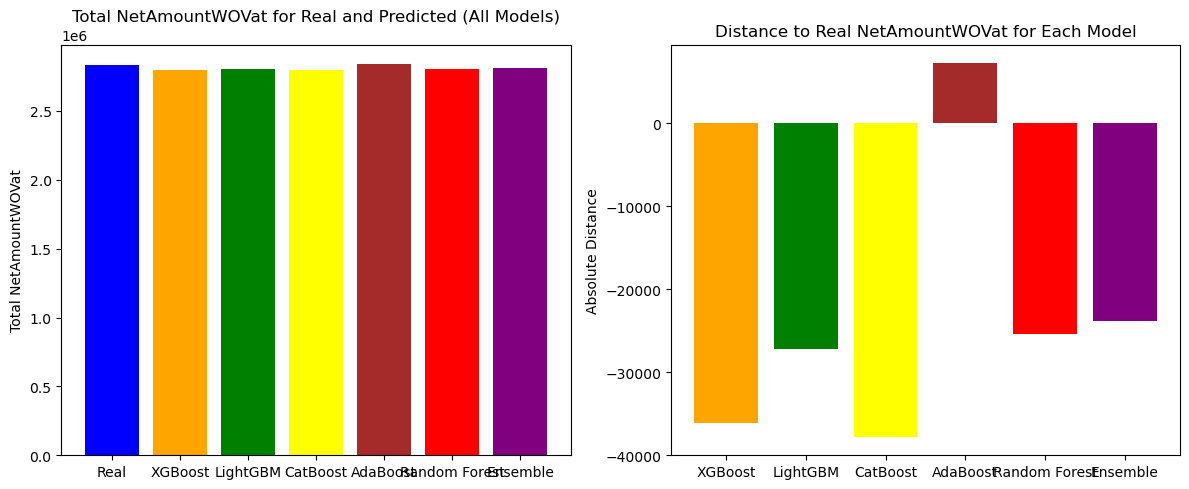

In [41]:
# Calculate the distance to real sales for each model
distance_xgb = xgb_sales - real_sales
distance_lgb = lgb_sales - real_sales
distance_cat = cat_sales - real_sales
distance_ada = ada_sales - real_sales
distance_rf = rf_sales - real_sales
distance_ensemble = ensemble_sales - real_sales

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot real and predicted sales for all models
axes[0].bar(['Real', 'XGBoost', 'LightGBM', 'CatBoost', 'AdaBoost', 'Random Forest', 'Ensemble'],
            [real_sales, xgb_sales, lgb_sales, cat_sales, ada_sales, rf_sales, ensemble_sales],
            color=['blue', 'orange', 'green', 'yellow', 'brown', 'red', 'purple'])
axes[0].set_title(f'Total {desired_column} for Real and Predicted (All Models)')
axes[0].set_ylabel(f'Total {desired_column}')

# Plot distance to real sales for each model
axes[1].bar(['XGBoost', 'LightGBM', 'CatBoost', 'AdaBoost', 'Random Forest', 'Ensemble'],
            [distance_xgb, distance_lgb, distance_cat, distance_ada, distance_rf, distance_ensemble],
            color=['orange', 'green', 'yellow', 'brown', 'red', 'purple'])
axes[1].set_title(f'Distance to Real {desired_column} for Each Model')
axes[1].set_ylabel('Absolute Distance')

# Display the plots
plt.tight_layout()
plt.show()

# PHASE 5: Forecasting

## Prepare the emtpy set

In [44]:
start_timestamp = '2024-02-08 20:00:00'
end_timestamp = '2024-02-18 23:00:00'

forecast_timestamps = pd.date_range(start=start_timestamp, end=end_timestamp, freq='H')

forecast_df = pd.DataFrame(index=forecast_timestamps)

forecast_df[f'Forecasted {desired_column}'] = np.nan
forecast_df[f'{desired_column} Before'] = np.nan
forecast_df['RollingMean'] = np.nan
forecast_df['RollingStd'] = np.nan

forecast_df["HourInterval"] = forecast_df.index.hour
forecast_df['DayOfWeek'] = forecast_df.index.dayofweek + 1

forecast_df = forecast_df[[f'Forecasted {desired_column}', 'HourInterval', 'DayOfWeek', f'{desired_column} Before', 'RollingMean', 'RollingStd']]

forecast_df.head(4)

Forecasted NetAmountWOVat  HourInterval  DayOfWeek  \
2024-02-08 20:00:00                        NaN            20          4   
2024-02-08 21:00:00                        NaN            21          4   
2024-02-08 22:00:00                        NaN            22          4   
2024-02-08 23:00:00                        NaN            23          4   

                     NetAmountWOVat Before  RollingMean  RollingStd  
2024-02-08 20:00:00                    NaN          NaN         NaN  
2024-02-08 21:00:00                    NaN          NaN         NaN  
2024-02-08 22:00:00                    NaN          NaN         NaN  
2024-02-08 23:00:00                    NaN          NaN         NaN

In [45]:
forecast_df.iloc[:3] = valid_df.iloc[-3:]

In [46]:
print(forecast_df.shape)
forecast_df.head(4)

(244, 6)


Forecasted NetAmountWOVat  HourInterval  DayOfWeek  \
2024-02-08 20:00:00                   32083.99            20          4   
2024-02-08 21:00:00                   23429.17            21          4   
2024-02-08 22:00:00                    8413.79            22          4   
2024-02-08 23:00:00                        NaN            23          4   

                     NetAmountWOVat Before   RollingMean    RollingStd  
2024-02-08 20:00:00               26992.63  31735.750000   4578.942490  
2024-02-08 21:00:00               32083.99  27501.930000   4349.829557  
2024-02-08 22:00:00               23429.17  21308.983333  11976.685085  
2024-02-08 23:00:00                    NaN           NaN           NaN

## Forecasts

In [47]:
xgb_forecast_df = forecast_df.copy()
lgb_forecast_df = forecast_df.copy()
cat_forecast_df = forecast_df.copy()
ada_forecast_df = forecast_df.copy()
rf_forecast_df = forecast_df.copy()

In [48]:
features = ['HourInterval', 'DayOfWeek', f'{desired_column} Before', 'RollingMean', 'RollingStd']

############################## XGBoost ###########################################
for i in range(2, len(xgb_forecast_df) + 100):
    input_array = xgb_forecast_df[features].iloc[i]
    input_df = pd.DataFrame([input_array])
    
    input_dmatrix = xgb.DMatrix(data=input_df)

    # Predict
    predicted_value = xgb_model.predict(input_dmatrix)
    
    # Update the "Predicted Sales" column
    xgb_forecast_df.iloc[i + 1, xgb_forecast_df.columns.get_loc(f'Forecasted {desired_column}')] = predicted_value.item()

    # Update the "Sales Before" column with the predicted value
    xgb_forecast_df.iloc[i + 1, xgb_forecast_df.columns.get_loc(f'{desired_column} Before')] = xgb_forecast_df.iloc[i, xgb_forecast_df.columns.get_loc(f'Forecasted {desired_column}')]

    # Update the rolling stats
    window_size = 3
    xgb_forecast_df.iloc[i + 1, xgb_forecast_df.columns.get_loc('RollingMean')] = xgb_forecast_df[f'Forecasted {desired_column}'][:i+1].mean()
    xgb_forecast_df.iloc[i + 1, xgb_forecast_df.columns.get_loc('RollingStd')] = xgb_forecast_df[f'Forecasted {desired_column}'][:i+1].std()

    if xgb_forecast_df.isnull().sum()[0] == 0:
        break

############################## LightGBM ##########################################
for i in range(2, len(forecast_df) + 100):
    input_array = lgb_forecast_df[features].iloc[i]
    input_df = pd.DataFrame([input_array])

    # Predict
    predicted_value = best_lgb_model.predict(input_df)
    
    # Update the "Predicted Sales" column
    lgb_forecast_df.iloc[i + 1, lgb_forecast_df.columns.get_loc(f'Forecasted {desired_column}')] = predicted_value.item()

    # Update the "Sales Before" column with the predicted value
    lgb_forecast_df.iloc[i + 1, lgb_forecast_df.columns.get_loc(f'{desired_column} Before')] = lgb_forecast_df.iloc[i, lgb_forecast_df.columns.get_loc(f'Forecasted {desired_column}')]

    # Update the rolling stats
    window_size = 3
    lgb_forecast_df.iloc[i + 1, lgb_forecast_df.columns.get_loc('RollingMean')] = lgb_forecast_df[f'Forecasted {desired_column}'][:i+1].mean()
    lgb_forecast_df.iloc[i + 1, lgb_forecast_df.columns.get_loc('RollingStd')] = lgb_forecast_df[f'Forecasted {desired_column}'][:i+1].std()

    if lgb_forecast_df.isnull().sum()[0] == 0:
        break

############################## CatBoost ################################
for i in range(2, len(cat_forecast_df) + 100):
    input_array = cat_forecast_df[features].iloc[i]
    input_df = pd.DataFrame([input_array])

    # Predict
    predicted_value = best_cat_model.predict(input_df)
    
    # Update the "Predicted Sales" column
    cat_forecast_df.iloc[i + 1, cat_forecast_df.columns.get_loc(f'Forecasted {desired_column}')] = predicted_value.item()

    # Update the "Sales Before" column with the predicted value
    cat_forecast_df.iloc[i + 1, cat_forecast_df.columns.get_loc(f'{desired_column} Before')] = cat_forecast_df.iloc[i, cat_forecast_df.columns.get_loc(f'Forecasted {desired_column}')]

    # Update the rolling stats
    window_size = 3
    cat_forecast_df.iloc[i + 1, cat_forecast_df.columns.get_loc('RollingMean')] = cat_forecast_df[f'Forecasted {desired_column}'][:i+1].mean()
    cat_forecast_df.iloc[i + 1, cat_forecast_df.columns.get_loc('RollingStd')] = cat_forecast_df[f'Forecasted {desired_column}'][:i+1].std()

    if cat_forecast_df.isnull().sum()[0] == 0:
        break
        
############################## AdaBoost ################################
for i in range(2, len(ada_forecast_df) + 100):
    input_array = ada_forecast_df[features].iloc[i]
    input_df = pd.DataFrame([input_array])

    # Predict
    predicted_value = best_ada_model.predict(input_df)
    
    # Update the "Predicted Sales" column
    ada_forecast_df.iloc[i + 1, ada_forecast_df.columns.get_loc(f'Forecasted {desired_column}')] = predicted_value.item()

    # Update the "Sales Before" column with the predicted value
    ada_forecast_df.iloc[i + 1, ada_forecast_df.columns.get_loc(f'{desired_column} Before')] = ada_forecast_df.iloc[i, ada_forecast_df.columns.get_loc(f'Forecasted {desired_column}')]

    # Update the rolling stats
    window_size = 3
    ada_forecast_df.iloc[i + 1, ada_forecast_df.columns.get_loc('RollingMean')] = ada_forecast_df[f'Forecasted {desired_column}'][:i+1].mean()
    ada_forecast_df.iloc[i + 1, ada_forecast_df.columns.get_loc('RollingStd')] = ada_forecast_df[f'Forecasted {desired_column}'][:i+1].std()

    if ada_forecast_df.isnull().sum()[0] == 0:
        break
        
############################## Random Forest ################################
for i in range(2, len(rf_forecast_df) + 100):
    input_array = rf_forecast_df[features].iloc[i]
    input_df = pd.DataFrame([input_array])

    # Predict
    predicted_value = best_rf_model.predict(input_df)
    
    # Update the "Predicted Sales" column
    rf_forecast_df.iloc[i + 1, rf_forecast_df.columns.get_loc(f'Forecasted {desired_column}')] = predicted_value.item()

    # Update the "Sales Before" column with the predicted value
    rf_forecast_df.iloc[i + 1, rf_forecast_df.columns.get_loc(f'{desired_column} Before')] = rf_forecast_df.iloc[i, rf_forecast_df.columns.get_loc(f'Forecasted {desired_column}')]

    # Update the rolling stats
    window_size = 3
    rf_forecast_df.iloc[i + 1, rf_forecast_df.columns.get_loc('RollingMean')] = rf_forecast_df[f'Forecasted {desired_column}'][:i+1].mean()
    rf_forecast_df.iloc[i + 1, rf_forecast_df.columns.get_loc('RollingStd')] = rf_forecast_df[f'Forecasted {desired_column}'][:i+1].std()

    if rf_forecast_df.isnull().sum()[0] == 0:
        break

## Plot Inference

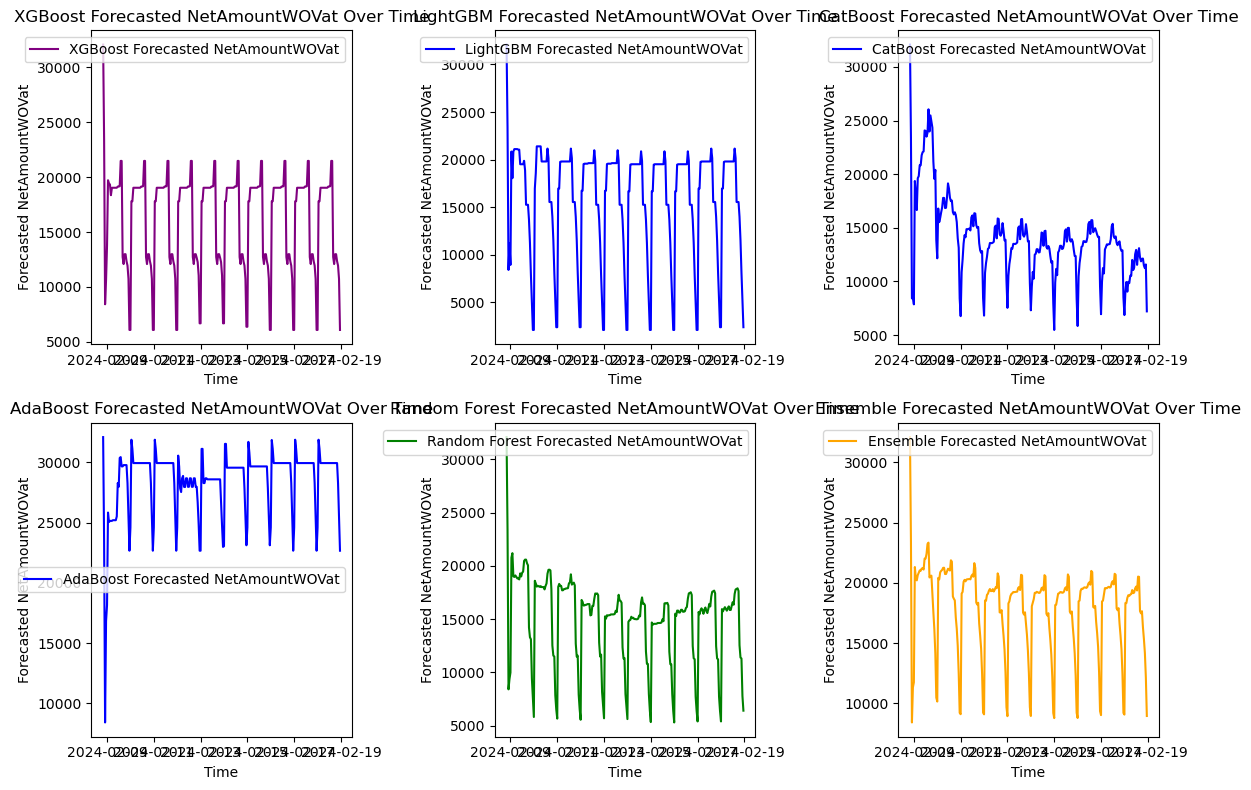

In [51]:
plt.figure(figsize=(12, 8))

# Plotting XGBoost forecast
plt.subplot(2, 3, 1)
plt.plot(xgb_forecast_df.index, xgb_forecast_df[f'Forecasted {desired_column}'], label=f'XGBoost Forecasted {desired_column}', c='purple')
plt.title(f'XGBoost Forecasted {desired_column} Over Time')
plt.xlabel('Time')
plt.ylabel(f'Forecasted {desired_column}')
plt.legend()

# Plotting LightGBM forecast
plt.subplot(2, 3, 2)
plt.plot(lgb_forecast_df.index, lgb_forecast_df[f'Forecasted {desired_column}'], label=f'LightGBM Forecasted {desired_column}', c='blue')
plt.title(f'LightGBM Forecasted {desired_column} Over Time')
plt.xlabel('Time')
plt.ylabel(f'Forecasted {desired_column}')
plt.legend()

# Plotting CatBoost forecast
plt.subplot(2, 3, 3)
plt.plot(cat_forecast_df.index, cat_forecast_df[f'Forecasted {desired_column}'], label=f'CatBoost Forecasted {desired_column}', c='blue')
plt.title(f'CatBoost Forecasted {desired_column} Over Time')
plt.xlabel('Time')
plt.ylabel(f'Forecasted {desired_column}')
plt.legend()

# Plotting AdaBoost forecast
plt.subplot(2, 3, 4)
plt.plot(ada_forecast_df.index, ada_forecast_df[f'Forecasted {desired_column}'], label=f'AdaBoost Forecasted {desired_column}', c='blue')
plt.title(f'AdaBoost Forecasted {desired_column} Over Time')
plt.xlabel('Time')
plt.ylabel(f'Forecasted {desired_column}')
plt.legend()

# Plotting Random Forest forecast
plt.subplot(2, 3, 5)
plt.plot(rf_forecast_df.index, rf_forecast_df[f'Forecasted {desired_column}'], label=f'Random Forest Forecasted {desired_column}', c='green')
plt.title(f'Random Forest Forecasted {desired_column} Over Time')
plt.xlabel('Time')
plt.ylabel(f'Forecasted {desired_column}')
plt.legend()

# Plotting Ensemble forecast
ensemble_forecast_df = pd.DataFrame()
ensemble_forecast_df[f'Forecasted {desired_column}'] = (xgb_forecast_df[f'Forecasted {desired_column}'] + lgb_forecast_df[f'Forecasted {desired_column}']
+ cat_forecast_df[f'Forecasted {desired_column}'] + ada_forecast_df[f'Forecasted {desired_column}'] + rf_forecast_df[f'Forecasted {desired_column}']) / 5
plt.subplot(2, 3, 6)
plt.plot(ensemble_forecast_df.index, ensemble_forecast_df[f'Forecasted {desired_column}'], label=f'Ensemble Forecasted {desired_column}', c='orange')
plt.title(f'Ensemble Forecasted {desired_column} Over Time')
plt.xlabel('Time')
plt.ylabel(f'Forecasted {desired_column}')
plt.legend()

plt.tight_layout()
plt.show()

## Table Inference

In [52]:
predictions_by_day_xgb = xgb_forecast_df.groupby(pd.Grouper(freq='D')).sum()  
predictions_by_day_xgb = predictions_by_day_xgb[[f"Forecasted {desired_column}"]].add_suffix('_XGB')

predictions_by_day_lgb = lgb_forecast_df.groupby(pd.Grouper(freq='D')).sum()
predictions_by_day_lgb = predictions_by_day_lgb[[f"Forecasted {desired_column}"]].add_suffix('_LGB')

predictions_by_day_cat = lgb_forecast_df.groupby(pd.Grouper(freq='D')).sum()
predictions_by_day_cat = predictions_by_day_cat[[f"Forecasted {desired_column}"]].add_suffix('_CAT')

predictions_by_day_ada = ada_forecast_df.groupby(pd.Grouper(freq='D')).sum()
predictions_by_day_ada = predictions_by_day_ada[[f"Forecasted {desired_column}"]].add_suffix('_ADA')

predictions_by_day_rf = rf_forecast_df.groupby(pd.Grouper(freq='D')).sum() 
predictions_by_day_rf = predictions_by_day_rf[[f"Forecasted {desired_column}"]].add_suffix('_RF')

predictions_by_day_ensemble = ensemble_forecast_df.groupby(pd.Grouper(freq='D')).sum()
predictions_by_day_ensemble = predictions_by_day_ensemble[[f"Forecasted {desired_column}"]].add_suffix('_Ensemble')

In [53]:
# Concatenate DataFrames
daily_predictions_df = pd.concat([predictions_by_day_xgb, predictions_by_day_lgb, predictions_by_day_cat, predictions_by_day_ada, predictions_by_day_rf, predictions_by_day_ensemble], axis=1)

# Display the DataFrame
daily_predictions_df

Forecasted NetAmountWOVat_XGB  Forecasted NetAmountWOVat_LGB  \
2024-02-08                   74571.898242                   75127.614702   
2024-02-09                  397096.932129                  397663.664374   
2024-02-10                  386239.364258                  392720.320548   
2024-02-11                  386239.364258                  383380.054296   
2024-02-12                  387780.313477                  377951.172896   
2024-02-13                  388383.856445                  377662.739425   
2024-02-14                  387133.981445                  376457.651014   
2024-02-15                  386530.438477                  376457.651014   
2024-02-16                  386239.364258                  376457.651014   
2024-02-17                  386239.364258                  383091.620826   
2024-02-18                  386239.364258                  383380.054296   

            Forecasted NetAmountWOVat_CAT  Forecasted NetAmountWOVat_ADA  \
2024-02-08                   75127.614702                   80751.910244   
2024-02-09                  397663.664374                  642408.226961   
2024-02-10                  392720.320548                  702650.746018   
2024-02-11                  383380.054296                  702650.746018   
2024-02-12                  377951.172896                  667512.436305   
2024-02-13                  377662.739425                  673167.509666   
2024-02-14                  376457.651014                  694259.443986   
2024-02-15                  376457.651014                  697213.745887   
2024-02-16                  376457.651014                  702629.332290   
2024-02-17                  383091.620826                  702650.746018   
2024-02-18                  383380.054296                  702650.746018   

            Forecasted NetAmountWOVat_RF  Forecasted NetAmountWOVat_Ensemble  
2024-02-08                  73310.260538                        75248.672951  
2024-02-09                 421154.946988                       472526.459143  
2024-02-10                 387361.464280                       451397.516613  
2024-02-11                 382458.276615                       437274.094064  
2024-02-12                 354099.480375                       422044.395370  
2024-02-13                 339719.907065                       420116.224636  
2024-02-14                 332089.517406                       417229.984749  
2024-02-15                 325890.072217                       417911.263535  
2024-02-16                 345834.570159                       427009.090041  
2024-02-17                 348181.725256                       425520.778093  
2024-02-18                 352077.292374                       417406.566691

# PHASE 6: Explainable AI

## Classic

In [54]:
## XGboost
feature_importance_xgb = xgb_model.get_fscore()
feature_importance_df_xgb = pd.DataFrame(list(feature_importance_xgb.items()), columns=['Feature', 'Importance'])

total_importance_xgb = feature_importance_df_xgb['Importance'].sum()
feature_importance_df_xgb['Importance Percentage'] = (feature_importance_df_xgb['Importance'] / total_importance_xgb) * 100

feature_importance_df_xgb = feature_importance_df_xgb.sort_values(by='Importance', ascending=False)

print("XGBoost:")
print(feature_importance_df_xgb)
print("")

## LightGBM
feature_importance_lgb = best_lgb_model.feature_importances_
feature_importance_df_lgb = pd.DataFrame({'Feature': X_valid.columns, 'Importance': feature_importance_lgb})

total_importance_lgb = feature_importance_df_lgb['Importance'].sum()
feature_importance_df_lgb['Importance Percentage'] = (feature_importance_df_lgb['Importance'] / total_importance_lgb) * 100

feature_importance_df_lgb = feature_importance_df_lgb.sort_values(by='Importance', ascending=False)

print("LightGBM:")
print(feature_importance_df_lgb)
print("")

## Catboost
feature_importance_cat = best_cat_model.feature_importances_
feature_importance_df_cat = pd.DataFrame({'Feature': X_valid.columns, 'Importance': feature_importance_cat})

total_importance_cat = feature_importance_df_cat['Importance'].sum()
feature_importance_df_cat['Importance Percentage'] = (feature_importance_df_cat['Importance'] / total_importance_cat) * 100

feature_importance_df_cat = feature_importance_df_cat.sort_values(by='Importance', ascending=False)

print("CatBoost:")
print(feature_importance_df_cat)
print("")

## Adaboost
feature_importance_ada = best_ada_model.feature_importances_
feature_importance_df_ada = pd.DataFrame({'Feature': X_valid.columns, 'Importance': feature_importance_ada})

total_importance_ada = feature_importance_df_ada['Importance'].sum()
feature_importance_df_ada['Importance Percentage'] = (feature_importance_df_ada['Importance'] / total_importance_ada) * 100

feature_importance_df_ada = feature_importance_df_ada.sort_values(by='Importance', ascending=False)

print("AdaBoost:")
print(feature_importance_df_ada)
print("")

## Random Forest 
feature_importance_rf = best_rf_model.feature_importances_
feature_importance_df_rf = pd.DataFrame({'Feature': X_valid.columns, 'Importance': feature_importance_rf})

total_importance_rf = feature_importance_df_rf['Importance'].sum()
feature_importance_df_rf['Importance Percentage'] = (feature_importance_df_rf['Importance'] / total_importance_rf) * 100
feature_importance_df_rf = feature_importance_df_rf.sort_values(by='Importance', ascending=False)

# Print the feature importance for Random Forest
print("Random Forest:")
print(feature_importance_df_rf)
print("")

XGBoost:
                 Feature  Importance  Importance Percentage
3            RollingMean        77.0              34.529148
2  NetAmountWOVat Before        50.0              22.421525
4             RollingStd        48.0              21.524664
0           HourInterval        37.0              16.591928
1              DayOfWeek        11.0               4.932735

LightGBM:
                 Feature  Importance  Importance Percentage
0           HourInterval         186              34.508349
3            RollingMean         166              30.797774
4             RollingStd          81              15.027829
2  NetAmountWOVat Before          64              11.873840
1              DayOfWeek          42               7.792208

CatBoost:
                 Feature  Importance  Importance Percentage
3            RollingMean   42.975471              42.975471
0           HourInterval   19.230401              19.230401
4             RollingStd   16.274382              16.274382
2  NetAmo

## SHAP

In [55]:
import shap

In [58]:
## XGB
explainer_xgb = shap.TreeExplainer(xgb_model)
shap_values_xgb_valid = explainer_xgb.shap_values(X_valid)
shap_values_xgb_train = explainer_xgb.shap_values(X_train)

df_shap_xgb_valid = pd.DataFrame(shap_values_xgb_valid, columns=X_valid.columns.values)
df_shap_xgb_train = pd.DataFrame(shap_values_xgb_train, columns=X_train.columns.values)

## LGB
explainer_lgb = shap.TreeExplainer(best_lgb_model)
shap_values_lgb_valid = explainer_lgb.shap_values(X_valid)
shap_values_lgb_train = explainer_lgb.shap_values(X_train)

df_shap_lgb_valid = pd.DataFrame(shap_values_lgb_valid, columns=X_valid.columns.values)
df_shap_lgb_train = pd.DataFrame(shap_values_lgb_train, columns=X_train.columns.values)

## CAT
explainer_cat = shap.TreeExplainer(best_cat_model)
shap_values_cat_valid = explainer_cat.shap_values(X_valid)
shap_values_cat_train = explainer_cat.shap_values(X_train)

df_shap_cat_valid = pd.DataFrame(shap_values_cat_valid, columns=X_valid.columns.values)
df_shap_cat_train = pd.DataFrame(shap_values_cat_train, columns=X_train.columns.values)

## ADA
explainer_ada = shap.KernelExplainer(best_ada_model.predict, X_train)
shap_values_ada_valid = explainer_ada.shap_values(X_valid)
shap_values_ada_train = explainer_ada.shap_values(X_train)

df_shap_ada_valid = pd.DataFrame(shap_values_ada_valid, columns=X_valid.columns.values)
df_shap_ada_train = pd.DataFrame(shap_values_ada_train, columns=X_train.columns.values)

## RF
explainer_rf = shap.TreeExplainer(best_rf_model)
shap_values_rf_valid = explainer_rf.shap_values(X_valid)
shap_values_rf_train = explainer_rf.shap_values(X_train)

df_shap_rf_valid = pd.DataFrame(shap_values_rf_valid, columns=X_valid.columns.values)
df_shap_rf_train = pd.DataFrame(shap_values_rf_train, columns=X_train.columns.values)

Using 162 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|████████████████████████████████████████████████████████████████████████████████| 162/162 [00:28<00:00,  5.72it/s]


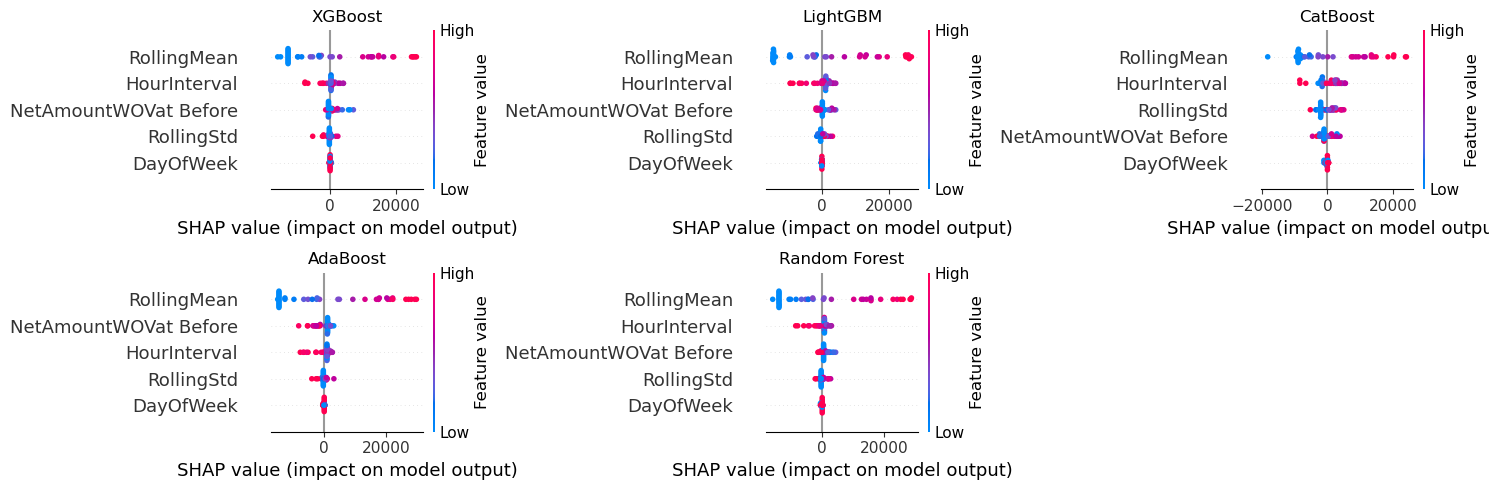

In [60]:
plt.figure(figsize=(15, 5))

# Plotting for XGBoost
plt.subplot(2, 3, 1)
shap.summary_plot(shap_values_xgb_valid, X_valid, plot_size=None, show=False)
plt.title('XGBoost')

# Plotting for LightGBM
plt.subplot(2, 3, 2)
shap.summary_plot(shap_values_lgb_valid, X_valid, plot_size=None, show=False)
plt.title('LightGBM')

# Plotting for CatBoost
plt.subplot(2, 3, 3)
shap.summary_plot(shap_values_cat_valid, X_valid, plot_size=None, show=False)
plt.title('CatBoost')

# Plotting for AdaBoost
plt.subplot(2, 3, 4)
shap.summary_plot(shap_values_ada_valid, X_valid, plot_size=None, show=False)
plt.title('AdaBoost')

# Plotting for Random Forest
plt.subplot(2, 3, 5)
shap.summary_plot(shap_values_rf_valid, X_valid, plot_size=None, show=False)
plt.title('Random Forest')

plt.tight_layout()
plt.show()

In [62]:
# j will be the record we explain
j = 40
sample = X_valid.iloc[[j]]
print(sample)
print("")

# init js
shap.initjs()

print("XGBoost prediction")
display(shap.force_plot(explainer_xgb.expected_value, shap_values_xgb_valid[j], sample))
print("LightGBM prediction")
display(shap.force_plot(explainer_lgb.expected_value, shap_values_lgb_valid[j], sample))
print("CatBoost prediction")
display(shap.force_plot(explainer_cat.expected_value, shap_values_cat_valid[j], sample))
print("AdaBoost prediction")
display(shap.force_plot(explainer_ada.expected_value, shap_values_ada_valid[j], sample))
print("Random Forest prediction")
display(shap.force_plot(explainer_rf.expected_value, shap_values_rf_valid[j], sample))

print("Ensemble prediction")
ensemble_expected = (explainer_xgb.expected_value + explainer_lgb.expected_value + explainer_cat.expected_value + explainer_ada.expected_value + explainer_rf.expected_value) / 5
ensemble_values = (shap_values_xgb_valid[j] + shap_values_lgb_valid[j] + shap_values_cat_valid[j] + shap_values_ada_valid[j] + shap_values_rf_valid[j]) / 5
display(shap.force_plot(ensemble_expected, ensemble_values, sample))

                     HourInterval  DayOfWeek  NetAmountWOVat Before  \
TransactionDateTime                                                   
2024-02-08 22:00:00            22          4               23429.17   

                      RollingMean    RollingStd  
TransactionDateTime                              
2024-02-08 22:00:00  21308.983333  11976.685085  



XGBoost prediction


LightGBM prediction


CatBoost prediction


AdaBoost prediction


Random Forest prediction


Ensemble prediction
